Genetic programming (subgenre of the genetic algorithm)
breaks a program up into a syntax tree, each node being
a "gene".

### Darwin's Theory of Natural Selection
 * Individual agents vary in their traits
 * Agents compete for resources; some reproduce - others don't
 * Some trait variations will increase an agent's advantage
 * Traits are passed along to offspring; sometimes with alterations

* Interesting concept:
NeuroEvolution of Augmenting Topologies (NEAT)
 * https://en.wikipedia.org/wiki/Neuroevolution_of_augmenting_topologies
 * https://www.cs.ucf.edu/~kstanley/neat.html
 * http://eplex.cs.ucf.edu/hyperNEATpage/HyperNEAT.html

In [1]:
# LINEAR / POLYNOMIAL REGRESSION
# Finds coefficients of fixed equations

# SYMBOLIC REGRESSION
# Finds entire mathematical expression, not just the coefficients

from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.utils.random import check_random_state
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

def fitme(x):
    # return(x*x - x + 2)
    # return(foldfn(-x*x + x + 100,100))
    return(0.1*x*x*x + x*x) # 1/10th x cubed + x squared

# rng = check_random_state(0)

x_train = np.random.uniform(-10,10,(50,1)) # 50 uniform random x's between -10 and 10
y_train = fitme(x_train)

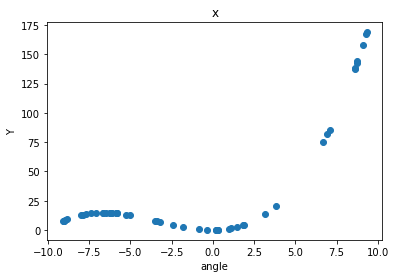

In [12]:
plt.scatter(x_train, y_train)
plt.title("x")
plt.xlabel("angle")
plt.ylabel("Y")
plt.show()

In [15]:
from gplearn.functions import make_function

def logic(x1, x2, x3, x4):
    return np.where(x1 > x2, x3, x4)

def absfn(x1): return np.where(x1 > 0, x1, -x1)

def foldfn(x1, x2): return np.where(x1 < x2, x1, 2*x2 - x1)

foldgpfn = make_function(function=foldfn, name='fold', arity=2)

est_gp = SymbolicRegressor(population_size=10000, parsimony_coefficient=0.1, function_set=('add','mul'))

est_gp.fit(x_train, y_train)

/home/dkm/.anaconda3/envs/PythonEduNotebooks/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SymbolicRegressor(function_set=('add', 'mul'), parsimony_coefficient=0.1,
                  population_size=10000)

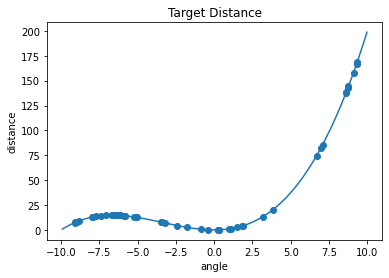

In [17]:
x_lots = np.reshape(np.sort(np.random.uniform(-10,10,250)),(-1,1))

y_gp = est_gp.predict(x_lots)

plt.scatter(x_train, y_train)
plt.plot(x_lots,y_gp)
plt.title("Target Distance")
plt.xlabel("angle")
plt.ylabel("distance")
plt.show()